<img src="../static/aeropython_name_mini.png" alt="AeroPython" style="width: 300px;"/>

# Ejemplo de widgets 

In [1]:
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
def transf_yukovski(a, t):
    """Dado el punto t (complejo) y el parámetro a
    a de la transformación proporciona el punto
    tau (complejo) en el que se transforma t."""
    tau = t + a ** 2 / t
    return tau

In [4]:
def flujo_perfil_circunferencia(landa, delta, alfa, U=1,  N_malla = 100):
    N_perfil=100
    a=1
    #punto del plano complejo
    t0 = a * (-landa + delta * 1j)
    #valor del radio de la circunferencia
    R = a * np.sqrt((1 + landa)**2 + delta**2)

    #se barre un ángulo de 0 a 2 pi
    theta = np.linspace(0, 2*np.pi, N_perfil)
    #se crean las coordenadas del los puntos
    #de la circunferencia
    Xc = - a * landa + R * np.cos(theta)
    Yc =   a * delta + R * np.sin(theta)
    
    #se crean las coordenadas del los puntos
    #del perfil
    Puntos_perfil = transf_yukovski(a, Xc+Yc*1j)
    Xp, Yp = np.real(Puntos_perfil) , np.imag(Puntos_perfil)
    
    #se crea la malla donde se va pintar la función de corriente

    # Dirección radial
    N_R = 50   # Número de puntos en la dirección radial
    R_min = R
    R_max = 10

    # Dirección tangencial
    N_T = 180   # Número de puntos en la dirección tangencial

    R_ = np.linspace(R_min, R_max, N_R)
    T_ = np.linspace(0, 2*np.pi , N_T)

    # El menos en la XX  es para que el borde de ataque del perfil esté en la izquierda
    XX = - (R_ * np.cos(T_).reshape((-1, 1)) - np.real(t0))
    YY = R_ * np.sin(T_).reshape((-1, 1)) + np.imag(t0)
    
    tt = XX + YY * 1j
    
    alfa = np.deg2rad(alfa)
    # Circulación que hay que añadir al cilindro para
    # que se cumpla la hipótesis de Kutta en el perfil
    T = 4 * np.pi * a * U * (delta + (1+landa) * alfa)
    #Potencial complejo
    f = U * ( (tt - t0) * np.exp(-alfa *1j) + R**2 / (tt - t0) * np.exp(alfa * 1j) )
    f += 1j * T / (2* np.pi) * np.log(tt - t0)
    #Función de corriente
    psi = np.imag(f)   

    Puntos_plano_tau = transf_yukovski(a, tt)
    XX_tau, YY_tau = np.real(Puntos_plano_tau) , np.imag(Puntos_plano_tau)
                
    #Se pinta
    fig, ax = plt.subplots(1,2)
    #lineas de corriente
    fig.set_size_inches(15,15)
    
    ax[0].contour(XX, YY, psi, np.linspace(-10,10,50), colors = ['blue', 'blue'])
    ax[0].grid()
    ax[0].set_aspect(1)
    p = plt.Polygon(list(zip(Xc, Yc)), color="#cccccc", zorder=10)
    ax[0].add_patch(p)
    ax[0].set_xlim(-5, 5)
    ax[0].set_ylim(-2,2)
    
    ax[1].contour(XX_tau, YY_tau, psi, np.linspace(-10,10,50), colors = ['blue', 'blue'])
    ax[1].grid()
    ax[1].set_aspect(1)
    p = plt.Polygon(list(zip(Xp, Yp)), color="#cccccc", zorder=10)
    ax[1].add_patch(p)
    ax[1].set_xlim(-5, 5)
    ax[1].set_ylim(-2,2)

In [5]:
from ipywidgets import interact

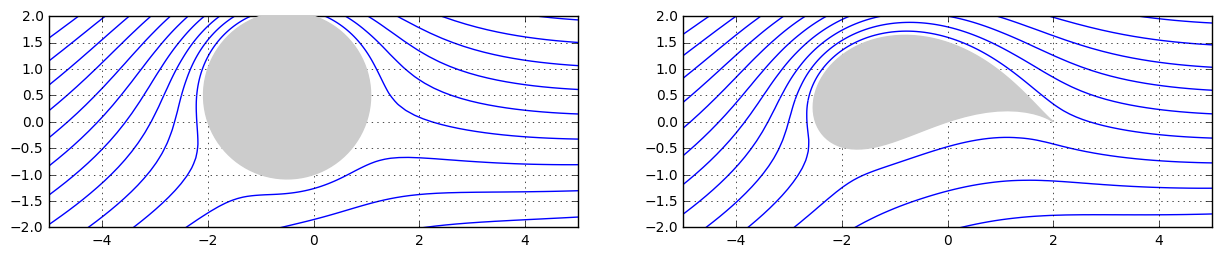

In [6]:
p= interact(flujo_perfil_circunferencia, landa=(0.,1), delta=(0.,1), alfa=(0, 30), U=(0,10))

In [7]:
def cp_perfil_circunferencia(landa, delta, alfa, U=1,  N_malla = 100):
    N_perfil=100
    a=1
    #punto del plano complejo
    t0 = a * (-landa + delta * 1j)
    #valor del radio de la circunferencia
    R = a * np.sqrt((1 + landa)**2 + delta**2)

    #se barre un ángulo de 0 a 2 pi
    theta = np.linspace(0, 2*np.pi, N_perfil)
    #se crean las coordenadas del los puntos
    #de la circunferencia
    Xc = - a * landa + R * np.cos(theta)
    Yc =   a * delta + R * np.sin(theta)
    
    #se crean las coordenadas del los puntos
    #del perfil
    Puntos_perfil = transf_yukovski(a, Xc+Yc*1j)
    Xp, Yp = np.real(Puntos_perfil) , np.imag(Puntos_perfil)
    
    #se crea la malla donde se va pintar la función de corriente

    # Dirección radial
    N_R = 50   # Número de puntos en la dirección radial
    R_min = R
    R_max = 10

    # Dirección tangencial
    N_T = 180   # Número de puntos en la dirección tangencial

    R_ = np.linspace(R_min, R_max, N_R)
    T_ = np.linspace(0, 2*np.pi, N_T)

    # El menos en la XX  es para que el borde de ataque del perfil esté en la izquierda
    XX = - (R_ * np.cos(T_).reshape((-1, 1)) - np.real(t0))
    YY = R_ * np.sin(T_).reshape((-1, 1)) + np.imag(t0)
    
    tt = XX + YY * 1j
    
    alfa = np.deg2rad(alfa)
    # Circulación que hay que añadir al cilindro para
    # que se cumpla la hipótesis de Kutta en el perfil
    T = 4 * np.pi * a * U * (delta + (1+landa) * alfa)
    
    #Velocidad conjugada
    dfdt = U * ( 1 * np.exp(-alfa * 1j) - R**2 / (tt - t0)**2 * np.exp(alfa * 1j) )
    dfdt = dfdt + 1j * T / (2*np.pi) * 1 / (tt - t0)
    #coeficiente de presion
    cp = 1 - np.abs(dfdt)**2 / U**2

    Puntos_plano_tau = transf_yukovski(a, tt)
    XX_tau, YY_tau = np.real(Puntos_plano_tau) , np.imag(Puntos_plano_tau)
                
    #Se pinta
    fig, ax = plt.subplots(1,2)
    
    #coeficiente de presión
    fig.set_size_inches(15,15)
    
    cmap = plt.cm.RdBu
    
    ax[0].contourf(XX, YY, cp, 200, cmap=cmap)
    ax[0].grid()
    ax[0].set_aspect(1)
    p = plt.Polygon(list(zip(Xc, Yc)), color="#cccccc", zorder=10)
    ax[0].add_patch(p)
    ax[0].set_xlim(-5, 5)
    ax[0].set_ylim(-3,3)
    
    ax[1].contourf(XX_tau, YY_tau, cp, 200, cmap=cmap)
    ax[1].grid()
    ax[1].set_aspect(1)
    p = plt.Polygon(list(zip(Xp, Yp)), color="#cccccc", zorder=10)
    ax[1].add_patch(p)
    ax[1].set_xlim(-5, 5)
    ax[1].set_ylim(-3,3)

<function __main__.cp_perfil_circunferencia>

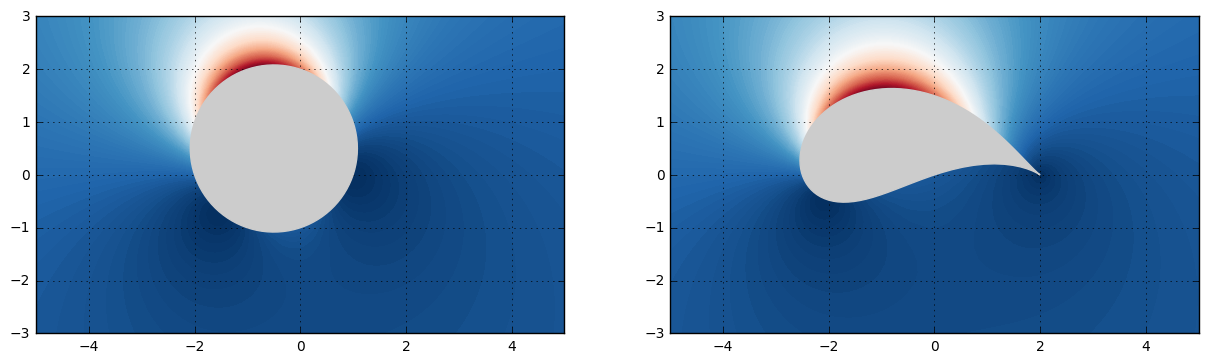

In [8]:
interact(cp_perfil_circunferencia, landa=(0.,1), delta=(0.,1), alfa=(0, 30), U=(0,10))

In [9]:
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = '../static/styles/style.css'
HTML(open(css_file, "r").read())